In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
news_dataset = pd.read_csv('train.csv')


In [7]:
sns.scatterplot(x = '1', y = '0', s = 70, hue ='real or fake', news_dataset=news_dataset);

ValueError: Could not interpret value `1` for parameter `x`

In [3]:
fake_count = news_dataset[news_dataset['label'] == 1].shape[0]
real_count = news_dataset[news_dataset['label'] == 0].shape[0]

# Print the counts
print("Fake news count:", fake_count)
print("Real news count:", real_count)

Fake news count: 10413
Real news count: 10387


In [3]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
news_dataset.shape

(20800, 5)

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
news_dataset = news_dataset.fillna('')

In [8]:
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [9]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [10]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [11]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [12]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [13]:
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [14]:
corpus=X
print(X)
print(corpus)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [15]:
print(Y)

[1 0 1 ... 0 1 1]


In [27]:
plt.figure(figsize=(10,7)) # Specify size of the chart
plt.scatter('fake', news_dataset=news_dataset[news_dataset.label==1], marker = 'x', c = 'red')
plt.scatter('real', news_dataset=news_dataset[news_dataset.label==0], marker = 'o', c = 'blue')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 720x504 with 0 Axes>

In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [17]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [26]:
class_0 = [X[i] for i in range(len(X)) if Y[i] == 0]
class_1 = [X[i] for i in range(len(X)) if Y[i] == 1]

# Scatter plot
plt.scatter(*zip(*class_0), color='red', label='Class 0')
plt.scatter(*zip(*class_1), color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Binary Classification')
plt.legend()
plt.show()

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [18]:
vec = CountVectorizer()
vec.fit(corpus)

X1 = vec.transform(corpus)

In [19]:
print(X1)

  (0, 267)	1
  (0, 2483)	1
  (0, 2959)	1
  (0, 3600)	1
  (0, 3792)	1
  (0, 4973)	1
  (0, 7005)	1
  (0, 7692)	1
  (0, 8630)	1
  (0, 8909)	1
  (0, 13473)	1
  (0, 15686)	1
  (1, 1497)	1
  (1, 1894)	1
  (1, 2223)	1
  (1, 2813)	1
  (1, 3568)	1
  (1, 5503)	2
  (1, 6816)	1
  (1, 16799)	1
  (2, 2943)	1
  (2, 3103)	1
  (2, 5389)	1
  (2, 5968)	1
  (2, 9620)	1
  :	:
  (20797, 3643)	1
  (20797, 7042)	1
  (20797, 8364)	1
  (20797, 8988)	1
  (20797, 9518)	1
  (20797, 9588)	1
  (20797, 10306)	1
  (20797, 12138)	1
  (20797, 12344)	1
  (20797, 13122)	1
  (20797, 14967)	1
  (20797, 15295)	1
  (20797, 16996)	1
  (20798, 350)	1
  (20798, 588)	1
  (20798, 1125)	1
  (20798, 5032)	1
  (20798, 6889)	1
  (20798, 10177)	1
  (20798, 11052)	1
  (20798, 13046)	1
  (20799, 377)	1
  (20799, 3623)	1
  (20799, 8036)	1
  (20799, 14852)	1


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify=Y, random_state=0)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9742132867132867


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)
print('precision =',precision)
print('recall=',recall)
print('f1-score=',f1)

precision = 0.9573393207970811
recall= 0.9927240977881258
f1-score= 0.9747106729532791


In [26]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X,Y,cv=10)

In [27]:
cv_score

array([0.97932692, 0.97692308, 0.97692308, 0.97596154, 0.98221154,
       0.97740385, 0.97932692, 0.97788462, 0.97596154, 0.97884615])

In [28]:
cv_score.mean()

0.9780769230769231

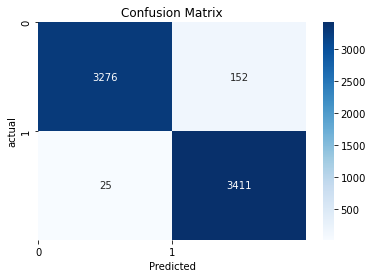

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['0', '1']
cm=confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

# Display the plot
plt.show()

In [21]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.33, stratify=Y, random_state=0)

In [31]:
model.fit(X1_train, Y_train)

LogisticRegression()

In [32]:
X1_test_prediction = model.predict(X1_test)
test_data_accuracy = accuracy_score(X1_test_prediction, Y_test)

In [33]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9887820512820513


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, X1_test_prediction)

array([[3366,   62],
       [  15, 3421]], dtype=int64)

In [35]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X1,Y,cv=10)

In [36]:
cv_score

array([0.99086538, 0.99038462, 0.9875    , 0.99038462, 0.99326923,
       0.98894231, 0.99038462, 0.99182692, 0.98990385, 0.99134615])

In [37]:
cv_score.mean()

0.9904807692307692

In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [38]:
linear_clf.fit(X_train, Y_train)
pred = linear_clf.predict(X_test)
score = accuracy_score(Y_test, pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.9934


In [39]:
precision = precision_score(Y_test, pred)
recall = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)
print('precision =',precision)
print('recall=',recall)
print('f1-score=',f1)

precision = 0.9938829012525487
recall= 0.9930151338766007
f1-score= 0.9934488280681322


In [40]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(linear_clf,X,Y,cv=10)

In [41]:
cv_score

array([0.99230769, 0.99423077, 0.99182692, 0.99567308, 0.99567308,
       0.99230769, 0.99326923, 0.99326923, 0.99086538, 0.99086538])

In [42]:
cv_score.mean()

0.9930288461538461

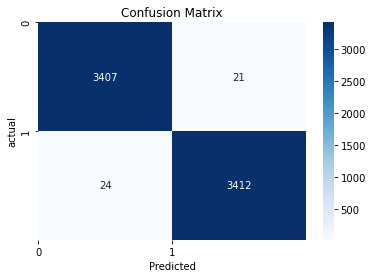

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, pred)
labels = ['0', '1']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

# Display the plot
plt.show()

In [44]:
linear_clf.fit(X1_train, Y_train)
pred = linear_clf.predict(X1_test)
score = accuracy_score(Y_test, pred)
print("accuracy:   %0.4f" % score)

accuracy:   0.993


In [45]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(linear_clf,X1,Y,cv=10)

In [46]:
cv_score

array([0.99519231, 0.99471154, 0.99134615, 0.99375   , 0.99759615,
       0.99375   , 0.99519231, 0.99519231, 0.99134615, 0.99375   ])

In [47]:
cv_score.mean()

0.9941826923076924

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3400,   28],
       [  22, 3414]], dtype=int64)

In [42]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [43]:
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
score = accuracy_score(Y_test, pred)

In [44]:
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9541083916083916


In [45]:
precision = precision_score(Y_test, pred)
recall = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)
print('precision =',precision)
print('recall=',recall)
print('f1-score=',f1)

precision = 0.9930489731437598
recall= 0.9147264260768335
f1-score= 0.9522799575821844


In [52]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(classifier,X,Y,cv=10)

In [53]:
cv_score

array([0.95625   , 0.95576923, 0.95961538, 0.95336538, 0.95769231,
       0.95817308, 0.95240385, 0.95817308, 0.95048077, 0.95096154])

In [54]:
cv_score.mean()

0.9552884615384615

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3406,   22],
       [ 293, 3143]], dtype=int64)

In [56]:
classifier.fit(X1_train, Y_train)
pred = classifier.predict(X1_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.962995337995338


In [57]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(classifier,X1,Y,cv=10)

In [58]:
cv_score

array([0.96682692, 0.96730769, 0.96634615, 0.96826923, 0.96923077,
       0.96682692, 0.96394231, 0.97163462, 0.96057692, 0.96682692])

In [59]:
cv_score.mean()

0.9667788461538462

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3404,   24],
       [ 230, 3206]], dtype=int64)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1250)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.907488344988345


In [60]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print('precision =',precision)
print('recall=',recall)
print('f1-score=',f1)

precision = 0.9224736048265461
recall= 0.889988358556461
f1-score= 0.9059398607613687


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3171,  257],
       [ 378, 3058]], dtype=int64)

In [62]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(knn,X,Y,cv=10)

In [63]:
cv_score

array([0.91201923, 0.89903846, 0.90769231, 0.91298077, 0.90673077,
       0.90480769, 0.90384615, 0.89807692, 0.89471154, 0.90048077])

In [64]:
cv_score.mean()

0.9040384615384616

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1250)
knn.fit(X1_train, Y_train)
y_pred = knn.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.523455710955711


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 157, 3271],
       [   0, 3436]], dtype=int64)

In [25]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(knn,X1,Y,cv=10)

In [26]:
cv_score

array([0.52644231, 0.52596154, 0.52596154, 0.51826923, 0.52596154,
       0.52836538, 0.51682692, 0.52211538, 0.51586538, 0.51826923])

In [27]:
cv_score.mean()

0.522403846153846

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9915501165501166


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion="gini",max_depth=100)
dt1.fit(X_train,Y_train)
y_pred = dt1.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9931526806526807


In [41]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt1,X,Y,cv=10)

In [42]:
cv_score

array([0.99615385, 0.99375   , 0.99230769, 0.99326923, 0.99375   ,
       0.99375   , 0.99278846, 0.99278846, 0.99423077, 0.98942308])

In [43]:
cv_score.mean()

0.9932211538461537

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3410,   18],
       [  29, 3407]], dtype=int64)

In [51]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt1,X1,Y,cv=10)

In [52]:
cv_score

array([0.99711538, 0.99663462, 0.99326923, 0.99519231, 0.99519231,
       0.99471154, 0.99759615, 0.99375   , 0.99711538, 0.99278846])

In [53]:
cv_score.mean()

0.9953365384615385

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion="gini",max_depth=100)
dt1.fit(X1_train,Y_train)
y_pred = dt1.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9947552447552448


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3410,   18],
       [  18, 3418]], dtype=int64)

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9932983682983683


In [146]:
clf1=RandomForestClassifier(n_estimators=110)
clf1.fit(X_train,Y_train)
y_pred=clf1.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9938811188811189


In [147]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(clf1,X,Y,cv=10)

In [148]:
cv_score

array([0.99471154, 0.99423077, 0.98942308, 0.99423077, 0.99615385,
       0.99375   , 0.99230769, 0.99326923, 0.99519231, 0.99134615])

In [149]:
cv_score.mean()

0.9934615384615384

In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3399,   29],
       [  13, 3423]], dtype=int64)

In [152]:
clf1=RandomForestClassifier(n_estimators=110)
clf1.fit(X1_train,Y_train)
y_pred=clf1.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9932983682983683


In [153]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(clf1,X1,Y,cv=10)

In [154]:
cv_score

array([0.99615385, 0.99278846, 0.98846154, 0.99375   , 0.99567308,
       0.99375   , 0.99423077, 0.99519231, 0.99375   , 0.99230769])

In [155]:
cv_score.mean()

0.9936057692307692

In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3391,   37],
       [   9, 3427]], dtype=int64)

In [175]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=3,gamma='auto')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9947552447552448


In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3413,   15],
       [  21, 3415]], dtype=int64)

In [179]:
from sklearn import svm
clf1 = svm.SVC(kernel='linear',C=3,gamma='auto')
clf1.fit(X1_train, Y_train)
y_pred = clf1.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9938811188811189


In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3407,   21],
       [  21, 3415]], dtype=int64)

In [187]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(clf,X,Y,cv=10)

In [188]:
cv_score

array([0.99326923, 0.99567308, 0.99278846, 0.99663462, 0.99615385,
       0.99423077, 0.99519231, 0.99615385, 0.99134615, 0.99182692])

In [189]:
cv_score.mean()

0.9943269230769232

In [184]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(clf1,X1,Y,cv=10)

In [185]:
cv_score

array([0.99519231, 0.99567308, 0.99086538, 0.99423077, 0.99855769,
       0.99375   , 0.99567308, 0.99423077, 0.99326923, 0.99471154])

In [186]:
cv_score.mean()

0.9946153846153847

In [190]:
clf11 = LogisticRegression()
clf22 = RandomForestClassifier()
clf33 = KNeighborsClassifier()

In [191]:
estimators = [('lr',clf11),('rf',clf22),('knn',clf33)]

In [192]:
for estimator in estimators:
    x11 = cross_val_score(estimator[1],X,Y,cv=10,scoring='accuracy')
    print(estimator[0],x11.mean())

lr 0.9780769230769231
rf 0.9936538461538461
knn 0.5259615384615384


In [194]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc,X,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9810576923076921


In [195]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9609615384615384


In [196]:
for estimator in estimators:
    x11 = cross_val_score(estimator[1],X1,Y,cv=10,scoring='accuracy')
    print(estimator[0],x11.mean())

lr 0.9904807692307692
rf 0.99375
knn 0.8232692307692308


In [197]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc,X1,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9900961538461539


In [198]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X1,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9813942307692306


In [207]:
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()

In [68]:
estimators = [('dt',clf111),('mnb',clf222),('rf',clf333)]

In [209]:
for estimator in estimators:
    x11 = cross_val_score(estimator[1],X,Y,cv=10,scoring='accuracy')
    print(estimator[0],x11.mean())

dt 0.9936057692307692
mnb 0.9552884615384615
rf 0.9935576923076923


In [210]:
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9954807692307692


In [211]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9949999999999999


In [212]:
for estimator in estimators:
    x11 = cross_val_score(estimator[1],X1,Y,cv=10,scoring='accuracy')
    print(estimator[0],x11.mean())

dt 0.9953365384615385
mnb 0.9667788461538462
rf 0.9936057692307694


In [213]:
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X1,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9960576923076925


In [214]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X1,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9961538461538462


In [27]:
from sklearn.ensemble import RandomForestClassifier
clff1 = RandomForestClassifier(n_estimators=100)
clff2 = RandomForestClassifier(n_estimators=110)
clff3 = RandomForestClassifier(n_estimators=120)

In [28]:
estimators = [('rf1',clff1),('rf2',clff2),('rf3',clff3)]

In [29]:
from sklearn.model_selection import cross_val_score
for estimator in estimators:
    x1 = cross_val_score(estimator[1],X,Y,cv=10,scoring='accuracy')
    print(estimator[0],x1.mean())

rf1 0.9936538461538461
rf2 0.9935096153846154
rf3 0.9933653846153845


In [30]:
from sklearn.ensemble import VotingClassifier
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x11 = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(x11.mean())

0.9939903846153847


In [1]:
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X,Y,cv=10,scoring='accuracy')
print(x12.mean())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\USER\AppData\Local\Temp/ipykernel_1492/4188150086.py", line 1, in <module>
    vc11 = VotingClassifier(estimators=estimators,voting='hard')
NameError: name 'VotingClassifier' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_cont

TypeError: object of type 'NoneType' has no len()

In [32]:
for estimator in estimators:
    x133 = cross_val_score(estimator[1],X1,Y,cv=10,scoring='accuracy')
    print(estimator[0],x133.mean())

rf1 0.993798076923077
rf2 0.9934615384615384
rf3 0.9938942307692308


In [33]:
vc112 = VotingClassifier(estimators=estimators,voting='soft')
x114 = cross_val_score(vc112,X1,Y,cv=10,scoring='accuracy')
print(x114.mean())

0.9939423076923077


In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
bag_model = BaggingClassifier(
    base_estimator=svm.SVC(), 
    n_estimators=100, 
    max_samples=0.7, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, Y_train)
bag_model.oob_score_

0.9788318025258324

In [48]:
pred = bag_model.predict(X_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9806235431235432


In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, Y_train)
bag_model.oob_score_

0.9923938002296211

In [23]:
pred = bag_model.predict(X_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9932983682983683


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bag_model, X, Y, cv=10)
scores.mean()

0.9938461538461538

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X1_train, Y_train)
bag_model.oob_score_

0.9927525832376579

In [64]:
pred = bag_model.predict(X1_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9944638694638694


In [65]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X1, Y, cv=10)
scores.mean()

0.9946634615384615

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=10)
gbc.fit(X_train,Y_train)
y_pred=gbc.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9663461538461539


In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3208,  220],
       [  11, 3425]], dtype=int64)

In [68]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(gbc,X,Y,cv=10)

In [69]:
cv_score

array([0.9625    , 0.96346154, 0.96490385, 0.96826923, 0.96826923,
       0.96586538, 0.96826923, 0.96634615, 0.95721154, 0.96586538])

In [70]:
cv_score.mean()

0.9650961538461538

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=10)
gbc.fit(X1_train,Y_train)
y_pred=gbc.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9616841491841492


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3176,  252],
       [  11, 3425]], dtype=int64)

In [73]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(gbc,X1,Y,cv=10)

In [74]:
cv_score

array([0.96298077, 0.96538462, 0.96346154, 0.96778846, 0.96875   ,
       0.96586538, 0.96538462, 0.96634615, 0.96057692, 0.96586538])

In [75]:
cv_score.mean()

0.9652403846153845

In [76]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)
y_pred=abc.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.983537296037296


In [83]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=200)
abc.fit(X_train,Y_train)
y_pred=abc.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9941724941724942


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3410,   18],
       [  22, 3414]], dtype=int64)

In [85]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(abc,X,Y,cv=10)

In [86]:
cv_score

array([0.99375   , 0.99326923, 0.98798077, 0.99471154, 0.99567308,
       0.99278846, 0.99519231, 0.99278846, 0.99182692, 0.99086538])

In [87]:
cv_score.mean()

0.9928846153846154

In [88]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=200)
abc.fit(X1_train,Y_train)
y_pred=abc.predict(X1_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9941724941724942


In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3408,   20],
       [  20, 3416]], dtype=int64)

In [90]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(abc,X1,Y,cv=10)

In [91]:
cv_score

array([0.99615385, 0.99471154, 0.98701923, 0.99423077, 0.99519231,
       0.99471154, 0.99471154, 0.99375   , 0.99230769, 0.99278846])

In [92]:
cv_score.mean()

0.9935576923076924

In [95]:
from sklearn.ensemble import AdaBoostClassifier
mod=LogisticRegression()
abc =AdaBoostClassifier(n_estimators=200, base_estimator=mod,learning_rate=1)
model = abc.fit(X_train, Y_train)
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9090909090909091


In [25]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9883449883449883

In [26]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X,Y,cv=10)

In [27]:
cv_score

array([0.98894231, 0.98846154, 0.98557692, 0.99038462, 0.99230769,
       0.99038462, 0.98653846, 0.99134615, 0.98990385, 0.98798077])

In [28]:
cv_score.mean()

0.9891826923076923

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3363,   65],
       [  15, 3421]], dtype=int64)

In [30]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X1_train, Y_train)
y_pred = model.predict(X1_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9902389277389277

In [31]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X1,Y,cv=10)

In [32]:
cv_score

array([0.99182692, 0.99086538, 0.98605769, 0.99134615, 0.99326923,
       0.99134615, 0.98990385, 0.99182692, 0.99086538, 0.98846154])

In [33]:
cv_score.mean()

0.990576923076923

In [29]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9880536130536131

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3393,   35],
       [  47, 3389]], dtype=int64)

In [31]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X1_train, Y_train)
y_pred = model.predict(X1_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9924242424242424

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3401,   27],
       [  25, 3411]], dtype=int64)

In [22]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='logistic')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9928613053613053

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3406,   22],
       [  27, 3409]], dtype=int64)

In [24]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='logistic')
model.fit(X1_train, Y_train)
y_pred = model.predict(X1_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9922785547785548

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3404,   24],
       [  29, 3407]], dtype=int64)

In [66]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='logistic',max_iter=400)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9916958041958042

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = PassiveAggressiveClassifier()
clf3 = RandomForestClassifier()

In [23]:
estimators = [('dt',clf1),('pca',clf2),('rf',clf3)]

In [25]:
from sklearn.model_selection import cross_val_score
for estimator in estimators:
    x11 = cross_val_score(estimator[1],X,Y,cv=10,scoring='accuracy')
    print(estimator[0],x11.mean())

dt 0.9935096153846155
pca 0.9935576923076923
rf 0.993173076923077


In [28]:
from sklearn.ensemble import VotingClassifier
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.995673076923077


In [29]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(x13.mean())

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 309, in predict
    maj = np.argmax(self.predict_proba(X)

KeyboardInterrupt: 

In [30]:
for estimator in estimators:
    x111 = cross_val_score(estimator[1],X1,Y,cv=10,scoring='accuracy')
    print(estimator[0],x111.mean())

dt 0.9949999999999999
pca 0.9942307692307694
rf 0.9933653846153847


In [31]:
vc111 = VotingClassifier(estimators=estimators,voting='hard')
x122 = cross_val_score(vc111,X1,Y,cv=10,scoring='accuracy')
print(x122.mean())

0.995673076923077


In [32]:
vc114 = VotingClassifier(estimators=estimators,voting='soft')
x133 = cross_val_score(vc114,X1,Y,cv=10,scoring='accuracy')
print(x133.mean())

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 309, in predict
    maj = np.argmax(self.predict_proba(X)

KeyboardInterrupt: 

In [55]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='hard')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9956293706293706

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3413,   15],
       [  15, 3421]], dtype=int64)

In [57]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3428
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      6864
   macro avg       1.00      1.00      1.00      6864
weighted avg       1.00      1.00      1.00      6864



In [58]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='soft')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.995483682983683

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3415,   13],
       [  18, 3418]], dtype=int64)

In [60]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3428
           1       1.00      0.99      1.00      3436

    accuracy                           1.00      6864
   macro avg       1.00      1.00      1.00      6864
weighted avg       1.00      1.00      1.00      6864



In [61]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='hard')
model.fit(X1_train,Y_train)
model.score(X1_test,Y_test)

0.9956293706293706

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3415,   13],
       [  18, 3418]], dtype=int64)

In [63]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3428
           1       1.00      0.99      1.00      3436

    accuracy                           1.00      6864
   macro avg       1.00      1.00      1.00      6864
weighted avg       1.00      1.00      1.00      6864



In [64]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='soft')
model.fit(X1_train,Y_train)
model.score(X1_test,Y_test)

0.9966491841491841

In [65]:
y_pred = model.predict(X1_test)
accuracy_score(Y_test,y_pred)

0.9966491841491841

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3417,   11],
       [  12, 3424]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3428
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      6864
   macro avg       1.00      1.00      1.00      6864
weighted avg       1.00      1.00      1.00      6864



In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(criterion="gini",max_depth=120), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, Y_train)
bag_model.oob_score_

0.9920350172215844

In [26]:
pred = bag_model.predict(X_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9938811188811189


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3406,   22],
       [  20, 3416]], dtype=int64)

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bag_model, X, Y, cv=10)
scores.mean()

0.99375

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(criterion="gini",max_depth=120), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X1_train, Y_train)
bag_model.oob_score_

0.9927525832376579

In [32]:
pred = bag_model.predict(X1_test)
score = accuracy_score(Y_test, pred)
print('Accuracy score of the test data : ', score)

Accuracy score of the test data :  0.9944638694638694


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[3409,   19],
       [  19, 3417]], dtype=int64)

In [34]:
scores = cross_val_score(bag_model, X1, Y, cv=10)
scores.mean()

0.9946634615384615

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier(criterion="gini",max_depth=120)
clf222 = MultinomialNB()
clf333 = RandomForestClassifier(n_estimators=110)
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='hard')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9949009324009324

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3411,   17],
       [  18, 3418]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       1.00      0.99      0.99      3436

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864
weighted avg       0.99      0.99      0.99      6864



In [40]:
estimators = [('dt',clf111),('pca',clf222),('rf',clf333)]

In [41]:
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9954807692307692


In [46]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9949519230769232


In [43]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier(criterion="gini",max_depth=120)
clf222 = MultinomialNB()
clf333 = RandomForestClassifier(n_estimators=110)
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='soft')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9944638694638694

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3412,   16],
       [  22, 3414]], dtype=int64)

In [45]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       1.00      0.99      0.99      3436

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864
weighted avg       0.99      0.99      0.99      6864



In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier(criterion="gini",max_depth=120)
clf222 = MultinomialNB()
clf333 = RandomForestClassifier(n_estimators=110)
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='hard')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
accuracy_score(Y_test,y_pred)

0.9960664335664335

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3412,   16],
       [  11, 3425]], dtype=int64)

In [49]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3428
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      6864
   macro avg       1.00      1.00      1.00      6864
weighted avg       1.00      1.00      1.00      6864



In [50]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier(criterion="gini",max_depth=120)
clf222 = MultinomialNB()
clf333 = RandomForestClassifier(n_estimators=110)
model = VotingClassifier(estimators=[('dt',clf111 ), ('mnb', clf222),('rf',clf333)], voting='soft')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
accuracy_score(Y_test,y_pred)

0.9962121212121212

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3416,   12],
       [  14, 3422]], dtype=int64)

In [52]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3428
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      6864
   macro avg       1.00      1.00      1.00      6864
weighted avg       1.00      1.00      1.00      6864



In [53]:
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X1,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9955769230769231


In [54]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X1,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9961538461538462


In [69]:
clf111 = DecisionTreeClassifier()
clf222 = MultinomialNB()
clf333 = RandomForestClassifier()

In [70]:
estimators = [('dt',clf111),('mnb',clf222),('rf',clf333)]

In [71]:
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9956250000000001


In [72]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9949999999999999


In [73]:
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X1,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9958173076923078


In [74]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X1,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9961057692307692


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('lr', clf222),('rf',clf333)], voting='hard')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9924242424242424

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3388,   40],
       [  12, 3424]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3428
           1       0.99      1.00      0.99      3436

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864
weighted avg       0.99      0.99      0.99      6864



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('lr', clf222),('rf',clf333)], voting='soft')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.99504662004662

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3411,   17],
       [  17, 3419]], dtype=int64)

In [27]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3428
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      6864
   macro avg       1.00      1.00      1.00      6864
weighted avg       1.00      1.00      1.00      6864



In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('lr', clf222),('rf',clf333)], voting='hard')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
accuracy_score(Y_test,y_pred)

0.9944638694638694

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3399,   29],
       [   9, 3427]], dtype=int64)

In [30]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3428
           1       0.99      1.00      0.99      3436

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864
weighted avg       0.99      0.99      0.99      6864



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
model = VotingClassifier(estimators=[('dt',clf111 ), ('lr', clf222),('rf',clf333)], voting='soft')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
accuracy_score(Y_test,y_pred)

0.9965034965034965

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3418,   10],
       [  14, 3422]], dtype=int64)

In [33]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3428
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      6864
   macro avg       1.00      1.00      1.00      6864
weighted avg       1.00      1.00      1.00      6864



In [34]:
estimators = [('dt',clf111),('lr',clf222),('rf',clf333)]

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9939423076923077


In [37]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9948076923076924


In [38]:
vc11 = VotingClassifier(estimators=estimators,voting='hard')
x12 = cross_val_score(vc11,X1,Y,cv=10,scoring='accuracy')
print(x12.mean())

0.9951923076923078


In [39]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x13 = cross_val_score(vc1,X1,Y,cv=10,scoring='accuracy')
print(x13.mean())

0.9961057692307694


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('pac', PassiveAggressiveClassifier()),
    ('lr',LogisticRegression())
]

In [26]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=RandomForestClassifier(),
    cv=10
)

In [27]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('pac', PassiveAggressiveClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=RandomForestClassifier())

In [28]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9949009324009324

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3409,   19],
       [  16, 3420]], dtype=int64)

In [30]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('pac', PassiveAggressiveClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=RandomForestClassifier())

In [31]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9956293706293706

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3417,   11],
       [  19, 3417]], dtype=int64)

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('mn', MultinomialNB())
]

In [35]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [36]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('pac', PassiveAggressiveClassifier()),
                               ('mn', MultinomialNB())],
                   final_estimator=LogisticRegression())

In [37]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9960664335664335

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3416,   12],
       [  15, 3421]], dtype=int64)

In [39]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('pac', PassiveAggressiveClassifier()),
                               ('mn', MultinomialNB())],
                   final_estimator=LogisticRegression())

In [40]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9962121212121212

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3417,   11],
       [  15, 3421]], dtype=int64)

In [42]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('rf', RandomForestClassifier())
]

In [43]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [44]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('gb', GradientBoostingClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [45]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9949009324009324

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3409,   19],
       [  16, 3420]], dtype=int64)

In [47]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('gb', GradientBoostingClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [50]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9957750582750583

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3416,   12],
       [  17, 3419]], dtype=int64)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('mn', MultinomialNB()),
    ('rf', RandomForestClassifier())
]

In [23]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [24]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('mn', MultinomialNB()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [25]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.995920745920746

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3415,   13],
       [  15, 3421]], dtype=int64)

In [29]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('mn', MultinomialNB()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [30]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9965034965034965

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3417,   11],
       [  13, 3423]], dtype=int64)

In [35]:
news=X1_test[0]

pred=clf.predict(news)
print(pred)

if(pred==0):
    print("The news is Real")
else:
    print("The news is Fake")


[1]
The news is Fake


In [36]:
print(Y_test[0])

1


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
estimators = [
    ('gb', GradientBoostingClassifier()),
    ('mn', MultinomialNB()),
    ('rf', RandomForestClassifier())
]

In [24]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [25]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('gb', GradientBoostingClassifier()),
                               ('mn', MultinomialNB()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [26]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9931526806526807

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3400,   28],
       [  19, 3417]], dtype=int64)

In [28]:
clf.fit(X1_train, Y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
#clf222 = MultinomialNB()
#clf333 = LogisticRegression()
#clf444 = KNeighborsClassifier()
clf666 = RandomForestClassifier()
clf777 = MLPClassifier()
#clf888 = GradientBoostingClassifier(random_state=10)
model = VotingClassifier(estimators=[('dt',clf111),('mnb',clf666),('gb',clf777)], voting='hard')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9953379953379954

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3411,   17],
       [  15, 3421]], dtype=int64)

In [35]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
#clf222 = MultinomialNB()
#clf333 = LogisticRegression()
#clf444 = KNeighborsClassifier()
clf666 = RandomForestClassifier()
clf777 = MLPClassifier()
#clf888 = GradientBoostingClassifier(random_state=10)
model = VotingClassifier(estimators=[('dt',clf111), ('mnb', clf666),('gb',clf777)], voting='soft')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9966491841491841

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3416,   12],
       [  11, 3425]], dtype=int64)

In [39]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
#clf222 = MultinomialNB()
#clf333 = LogisticRegression()
#clf444 = KNeighborsClassifier()
clf666 = RandomForestClassifier()
clf777 = MLPClassifier()
#clf888 = GradientBoostingClassifier(random_state=10)
model = VotingClassifier(estimators=[('knn',clf111),('rf',clf666),('mlp',clf777)], voting='hard')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
model.score(X1_test,Y_test)

0.9962121212121212

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3411,   17],
       [   9, 3427]], dtype=int64)

In [45]:
from sklearn.ensemble import VotingClassifier
clf111 = DecisionTreeClassifier()
#clf222 = MultinomialNB()
#clf333 = LogisticRegression()
#clf444 = KNeighborsClassifier()
clf666 = RandomForestClassifier()
clf777 = MLPClassifier()
#clf888 = GradientBoostingClassifier(random_state=10)
model = VotingClassifier(estimators=[('knn',clf111),('rf',clf666),('mlp',clf777)], voting='soft')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
model.score(X1_test,Y_test)

0.9972319347319347

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3417,   11],
       [   8, 3428]], dtype=int64)

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
clf111 = MultinomialNB()
#clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
#clf444 = MLPClassifier()
#clf555 = GradientBoostingClassifier(random_state=10)
#clf666= svm.SVC(kernel='linear',gamma='auto',C=3)
clf777 = XGBClassifier()
model = VotingClassifier(estimators=[('dt',clf333 ),('mnb',clf777),('gb',clf111)], voting='hard')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9934440559440559

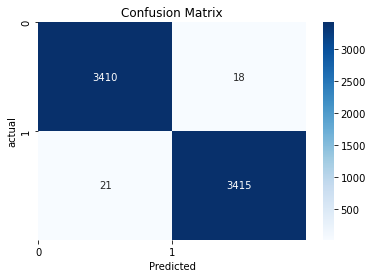

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['0', '1']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

# Display the plot
plt.show()

In [38]:
clf111 = MultinomialNB()
#clf222 = LogisticRegression()
clf333 = RandomForestClassifier()
#clf444 = MLPClassifier()
#clf555 = GradientBoostingClassifier(random_state=10)
#clf666= svm.SVC(kernel='linear',gamma='auto',C=3)
clf777 = XGBClassifier()
model = VotingClassifier(estimators=[('dt',clf777 ),('mnb',clf333),('gb',clf111)], voting='hard')
model.fit(X1_train,Y_train)
y_pred = model.predict(X1_test)
accuracy_score(Y_test,y_pred)

0.9937354312354313

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3411,   17],
       [  19, 3417]], dtype=int64)

In [42]:
estimators = [
    ('gb', GradientBoostingClassifier(random_state=10)),
    ('svm', svm.SVC(kernel='linear',gamma='auto',C=3)),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [43]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [44]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.99504662004662

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3412,   16],
       [  18, 3418]], dtype=int64)

In [46]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [47]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9951923076923077

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3411,   17],
       [  16, 3420]], dtype=int64)

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
estimators = [
    ('xgb', XGBClassifier()),
    ('svm', svm.SVC(kernel='linear',gamma='auto',C=3)),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [35]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...
                          

In [36]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9949009324009324

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3410,   18],
       [  17, 3419]], dtype=int64)

In [38]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...
                          

In [39]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9946095571095571

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3408,   20],
       [  17, 3419]], dtype=int64)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
estimators = [
    ('mnb', MultinomialNB()),
    ('svm', svm.SVC(kernel='linear',gamma='auto',C=3)),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [24]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('mnb', MultinomialNB()),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [25]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9946095571095571

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3409,   19],
       [  18, 3418]], dtype=int64)

In [28]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('mnb', MultinomialNB()),
                               ('svm', SVC(C=3, gamma='auto', kernel='linear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [29]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9953379953379954

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3413,   15],
       [  17, 3419]], dtype=int64)

In [41]:
estimators = [
    ('xgb', XGBClassifier()),
    ('svm', svm.SVC(kernel='linear',gamma='auto',C=3)),
    ('mlp', MLPClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [42]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...
                          

In [43]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9957750582750583

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3416,   12],
       [  17, 3419]], dtype=int64)

In [45]:
clf.fit(X1_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...
                          

In [46]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9947552447552448

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3410,   18],
       [  18, 3418]], dtype=int64)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
estimators = [
    ('gb', GradientBoostingClassifier(random_state=10)),
    ('mlp', MLPClassifier()),
    ('rf', RandomForestClassifier())
]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [23]:
clf.fit(X_train, Y_train)

StackingClassifier(cv=10,
                   estimators=[('gb',
                                GradientBoostingClassifier(random_state=10)),
                               ('mlp', MLPClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [24]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9953379953379954

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3415,   13],
       [  19, 3417]], dtype=int64)

In [ ]:
clf.fit(X1_train, Y_train)

In [ ]:
y_pred = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)